# Analyze Los Angeles street trees
> This notebook seeks to answer questions about the City of Los Angeles' [historical inventory](https://geohub.lacity.org/datasets/lahub::trees-bureau-of-street-services/about) of roughly 510,000 roadside trees. The data were downloaded and processed in the `00-fetch-la-trees-data` notebook.

---

#### Load Python tools and Jupyter config

In [1]:
import pandas as pd
import altair as alt
import jupyter_black
import geopandas as gpd
from collections import defaultdict
from fuzzywuzzy import process, fuzz

In [2]:
jupyter_black.load()
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
today = pd.Timestamp.today().strftime("%Y-%m-%d")

---

## Read

#### Import geojson file with tree locations, species

In [4]:
gdf = gpd.read_file("../data/processed/la_tree_locations_locations.geojson")

In [5]:
gdf.sample(4)

,tree_id,species,botanical_name,geometry
478271,1264390,CAMPHOR TREE,CINNAMOMUM CAMPHORA,POINT (-118.32019 34.09401)
242518,940553,MEXICAN FAN PALM,WASHINGTONIA ROBUSTA,POINT (-118.45629 33.98830)
264011,965239,CAMPHOR TREE,CINNAMOMUM CAMPHORA,POINT (-118.50410 34.20711)
76295,474505,BOTTLEBRUSH,CALLISTEMON CITRINUS,POINT (-118.52752 34.14817)


In [6]:
len(gdf)

517009

---

## Analyze

### 1. How many different species are there?

#### Limit the data to only rows with a specifided species

In [7]:
gdf_species = gdf.query('species != "NOT SPECIFIED" and species != "<NULL>"').copy()

#### How many trees have a specified species?

In [8]:
len(gdf_species)

358985

#### How many unique species are there? 

In [9]:
len(gdf_species["species"].unique())

544

###

### 2. Which species are most common?

#### Group by species name and count

In [10]:
species_counts = (
    gdf_species.groupby(["species"])["tree_id"]
    .count()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .reset_index(drop=True)
)

#### Calculate the a species rate per 1,000 named trees

In [11]:
species_counts["count_per_1000"] = (
    (species_counts["count"] / species_counts["count"].sum()) * 1000
).round()

In [12]:
species_counts.head()

,species,count,count_per_1000
0,AMERICAN SWEETGUM,29405,82.0
1,MEXICAN FAN PALM,25258,70.0
2,SOUTHERN MAGNOLIA,24314,68.0
3,CRAPE MYRTLE,19975,56.0
4,JACARANDA,14139,39.0


---

### 2. How many are trees in my neighborhood?

In [13]:
hoods_gdf = gpd.read_file("../data/processed/la_neigborhoods_pop_race.geojson")

<Axes: >

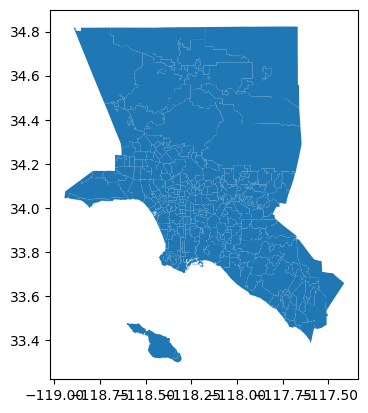

In [14]:
hoods_gdf.plot()

In [15]:
hoods_gdf.head()

,id,name,original_id,pop,pop_one_race,white,black,asian,other,ai_an,nh_pi,multirace,pop_one_race_pct,white_pct,black_pct,asian_pct,other_pct,ai_an_pct,nh_pi_pct,multirace_pct,majority,plurality_white,geometry
0,acton,Acton,acton,7431,6404,5122,80,158,956,72,16,1027,86.18,68.93,1.08,2.13,12.87,0.97,0.22,13.82,white,True,"MULTIPOLYGON (((-118.20703 34.53902, -118.2069..."
1,adams-normandie,Adams-Normandie,adams-normandie,16922,14659,2040,2747,995,8441,428,8,2263,86.63,12.06,16.23,5.88,49.88,2.53,0.05,13.37,other,False,"MULTIPOLYGON (((-118.30800 34.03740, -118.3089..."
2,agoura-hills,Agoura Hills,agoura-hills,20299,18132,15279,262,1776,732,66,17,2167,89.32,75.27,1.29,8.75,3.61,0.33,0.08,10.68,white,True,"MULTIPOLYGON (((-118.77621 34.16816, -118.7888..."
3,agua-dulce,Agua Dulce,agua-dulce,3510,2951,2476,48,61,332,31,3,559,84.07,70.54,1.37,1.74,9.46,0.88,0.09,15.93,white,True,"MULTIPOLYGON (((-118.37822 34.48811, -118.3781..."
4,alhambra,Alhambra,alhambra,82876,72118,11898,1537,42981,14552,1061,89,10758,87.02,14.36,1.85,51.86,17.56,1.28,0.11,12.98,asian,False,"MULTIPOLYGON (((-118.12175 34.10504, -118.1279..."


In [16]:
How are the trees dispersed? 

What are the most common species in my neighborhood? 
Do I have more trees than other neighboods, relative to its area or population? 

SyntaxError: invalid syntax (3254992858.py, line 1)

#### Base URL for the API endpoint

---

## Exports

#### JSON

In [ ]:
# gdf[["tree_id", "species", "botanical_name", "longitude", "latitude"]].to_json(
#     "../data/processed/la_tree_locations.json", indent=4, orient="records"
# )

#### CSV

In [ ]:
# gdf[["tree_id", "species", "botanical_name", "longitude", "latitude"]].to_csv(
#     "../data/released/la_tree_locations.csv", index=False
# )

#### GeoJSON

In [ ]:
# gdf[["tree_id", "species", "botanical_name", "geometry"]].to_file(
#     "../data/processed/la_tree_locations_locations.geojson",
#     driver="GeoJSON",
# )